In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import os
from sklearnex import patch_sklearn
patch_sklearn()

base_path = "../datasets/phase1/train/"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)

X, y = X_train, y_train

def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

model_name = "Decision Tree"
model = DecisionTreeRegressor()
param_name = "max_depth"
param_range = range(10, 20)

plot_validation_curve(model, param_name, param_range, model_name)

final_model = DecisionTreeRegressor(max_depth=5)
plot_learning_curve(final_model, model_name)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


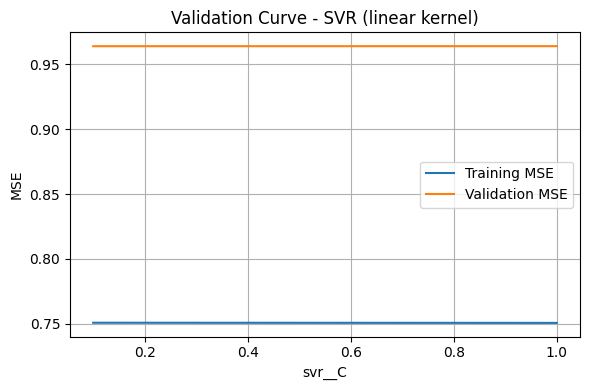

Best svr__C: 0.1 with Validation MSE: 0.96


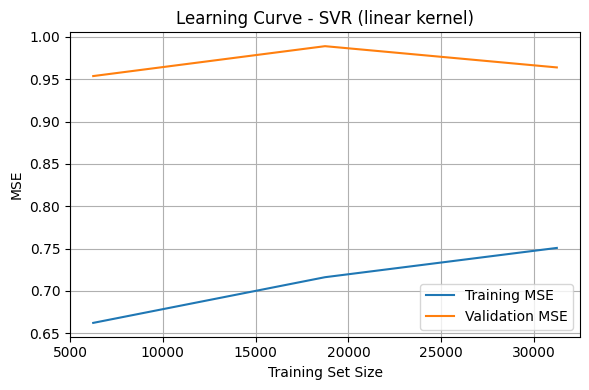

Bias Estimate (Final Training MSE): 0.75
Variance Estimate (Gap): 0.21


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import os
from sklearnex import patch_sklearn
patch_sklearn()
base_path = "phase1/train/"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)

X, y = X_train, y_train

# --- Validation Curve ---
def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=2,  
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_index = np.argmin(val_mean)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_mean[best_index]:.2f}")

def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.2, 1.0, 3), 
        cv=2,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Bias Estimate (Final Training MSE): {train_mean[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_mean[-1] - train_mean[-1]:.2f}")

model_name = "SVR (linear kernel)"
model = make_pipeline(StandardScaler(), SVR(kernel='linear'))
param_name = "svr__C"
param_range = [0.1, 1]  

plot_validation_curve(model, param_name, param_range, model_name)

final_model = make_pipeline(StandardScaler(), SVR(C=1, kernel='linear'))
plot_learning_curve(final_model, model_name)

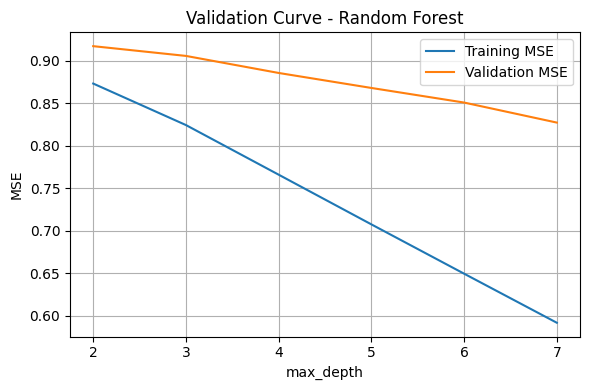

Best max_depth: 7 with Validation MSE: 0.83


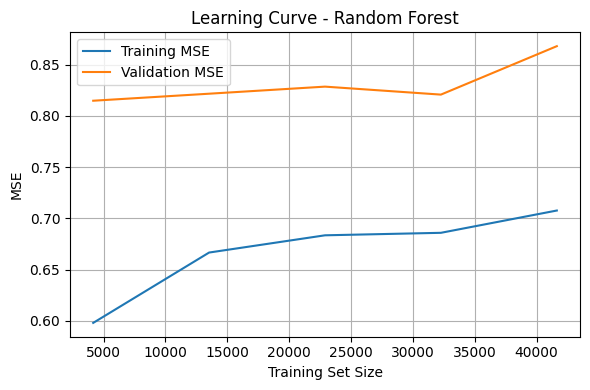

Bias Estimate (Final Training MSE): 0.71
Variance Estimate (Gap): 0.16


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import RandomForestRegressor
import os
 
base_path = r"C:\Users\Dear user\Desktop\datasets"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)

X, y = X_train, y_train

def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_index = np.argmin(val_mean)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_mean[best_index]:.2f}")
def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 5), 
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Bias Estimate (Final Training MSE): {train_mean[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_mean[-1] - train_mean[-1]:.2f}")
model_name = "Random Forest"
model = RandomForestRegressor(n_estimators=30, warm_start=True, random_state=42)
param_name = "max_depth"
param_range = range(2, 8) 

plot_validation_curve(model, param_name, param_range, model_name)

best_model = RandomForestRegressor(n_estimators=30, max_depth=5, warm_start=True, random_state=42)
plot_learning_curve(best_model, model_name)

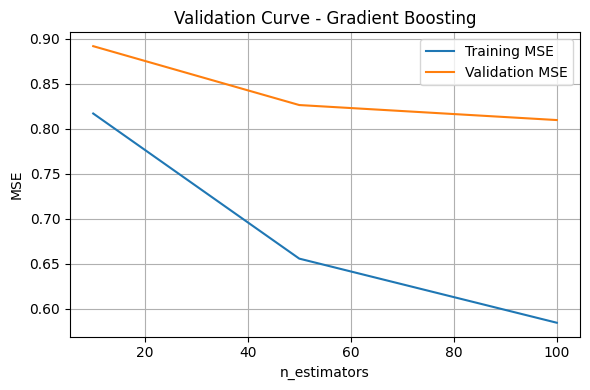

Best n_estimators: 100 with Validation MSE: 0.81


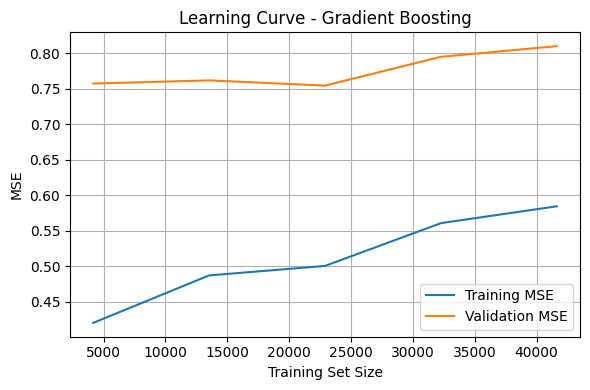

Bias Estimate (Final Training MSE): 0.58
Variance Estimate (Gap): 0.23


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.ensemble import GradientBoostingRegressor
import os

base_path = r"C:\Users\Dear user\Desktop\datasets"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)

X, y = X_train, y_train

def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=3, 
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_index = np.argmin(val_mean)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_mean[best_index]:.2f}")

def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, 5), 
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Bias Estimate (Final Training MSE): {train_mean[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_mean[-1] - train_mean[-1]:.2f}")

model_name = "Gradient Boosting"
model = GradientBoostingRegressor(random_state=42)
param_name = "n_estimators"
param_range = [10, 50, 100] 

plot_validation_curve(model, param_name, param_range, model_name)

final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
plot_learning_curve(final_model, model_name)

=== Estimated Runtime ===
Estimated Validation Curve Time: 15.0 seconds (15 models)
Estimated Learning Curve Time: 15.0 seconds (15 models)
Total Estimated Time: 30.0 seconds



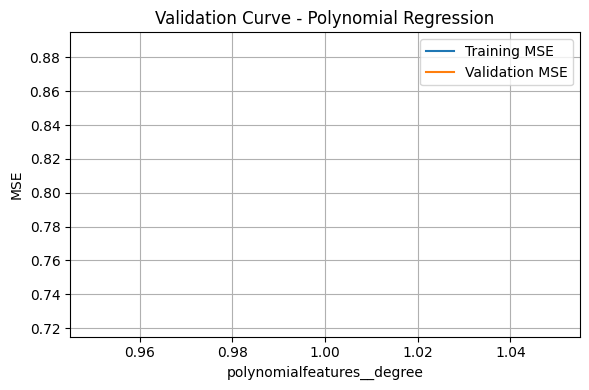

Best polynomialfeatures__degree: 2 with Validation MSE: nan
Actual Validation Curve Time: 15.88 seconds


MemoryError: Unable to allocate 57.1 MiB for an array with shape (22903, 327) and data type float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import os
import time

base_path = r"C:\Users\Dear user\Desktop\datasets"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)

X, y = X_train, y_train

param_range = range(1, 6)
cv = 3
learning_curve_train_sizes = 5 
estimated_time_per_model = 1.0

val_models = len(param_range) * cv
learn_models = learning_curve_train_sizes * cv

val_time = val_models * estimated_time_per_model
learn_time = learn_models * estimated_time_per_model

print("=== Estimated Runtime ===")
print(f"Estimated Validation Curve Time: {val_time:.1f} seconds ({val_models} models)")
print(f"Estimated Learning Curve Time: {learn_time:.1f} seconds ({learn_models} models)")
print(f"Total Estimated Time: {val_time + learn_time:.1f} seconds")
print("=========================\n")

def plot_validation_curve(model, param_name, param_range, model_name):
    train_scores, val_scores = validation_curve(
        model, X, y,
        param_name=param_name,
        param_range=param_range,
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_mean, label='Training MSE')
    plt.plot(param_range, val_mean, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

    best_index = np.argmin(val_mean)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_mean[best_index]:.2f}")

def plot_learning_curve(model, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.1, 1.0, learning_curve_train_sizes),
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    train_mean = -np.mean(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label='Training MSE')
    plt.plot(train_sizes, val_mean, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

    print(f"Bias Estimate (Final Training MSE): {train_mean[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_mean[-1] - train_mean[-1]:.2f}")

model_name = "Polynomial Regression"
model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_name = "polynomialfeatures__degree"

start_time = time.time()
plot_validation_curve(model, param_name, param_range, model_name)
end_time = time.time()
print(f"Actual Validation Curve Time: {end_time - start_time:.2f} seconds")

final_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

start_time = time.time()
plot_learning_curve(final_model, model_name)
end_time = time.time()
print(f"Actual Learning Curve Time: {end_time - start_time:.2f} seconds")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import os
base_path = r"C:\Users\Dear user\Desktop\datasets"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'X1_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X2_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X3_train.csv')).values,
    pd.read_csv(os.path.join(base_path, 'X4_train.csv')).values
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path, 'y1_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y2_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y3_train.csv')).values.ravel(),
    pd.read_csv(os.path.join(base_path, 'y4_train.csv')).values.ravel()
], axis=0)
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}
rf_model = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf_model, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb_model, gb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)
print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)

svr_pipeline = make_pipeline(StandardScaler(), SVR())
svr_params = {
    'svr__C': [0.1, 1, 10],
    'svr__kernel': ['linear', 'rbf'],
    'svr__gamma': ['scale', 'auto']
}
grid_svr = GridSearchCV(svr_pipeline, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr.fit(X_train, y_train)
print("Best Parameters for SVR:", grid_svr.best_params_)

poly_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
poly_params = {
    'polynomialfeatures__degree': [1, 2, 3],
    'linearregression__fit_intercept': [True, False]
}
grid_poly = GridSearchCV(poly_pipeline, poly_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_poly.fit(X_train, y_train)
print("Best Parameters for Polynomial Regression:", grid_poly.best_params_)

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt_model = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(dt_model, dt_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_dt.best_params_)

KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import os
import time
from sklearnex import patch_sklearn
patch_sklearn()
base_path_train = "phase1/train/"
base_path_test = "phase1/test/"

X_train = np.concatenate([
    pd.read_csv(os.path.join(base_path_train, f'X{i}_train.csv')).values for i in range(1, 5)
], axis=0)

y_train = np.concatenate([
    pd.read_csv(os.path.join(base_path_train, f'y{i}_train.csv')).values.ravel() for i in range(1, 5)
], axis=0)

X_test = np.concatenate([
    pd.read_csv(os.path.join(base_path_test, f'X{i}_test.csv')).values for i in range(1, 5)
], axis=0)

y_test = np.concatenate([
    pd.read_csv(os.path.join(base_path_test, f'y{i}_test.csv')).values.ravel() for i in range(1, 5)
], axis=0)

X, y = X_train, y_train

param_range = range(1, 6)
cv = 3
learning_curve_train_sizes = np.linspace(0.1, 1.0, 5)

val_models = len(param_range) * cv
learn_models = len(learning_curve_train_sizes) * cv
estimated_time_per_model = 1.0

print("\n=== Estimated Runtime ===")
print(f"Estimated Validation Curve Time: {val_models * estimated_time_per_model:.1f} seconds")
print(f"Estimated Learning Curve Time: {learn_models * estimated_time_per_model:.1f} seconds")
print(f"Total Estimated Time: {(val_models + learn_models) * estimated_time_per_model:.1f} seconds")
print("=========================\n")

def plot_validation_curve_tqdm(model, param_name, param_range, model_name):
    train_scores, val_scores = [], []

    print("Computing Validation Curve...")
    for degree in tqdm(param_range, desc="Validation Curve Degrees"):
        model.set_params(**{param_name: degree})
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        train_fold_scores, val_fold_scores = [], []

        for train_index, val_index in kf.split(X):
            X_tr, X_val = X[train_index], X[val_index]
            y_tr, y_val = y[train_index], y[val_index]

            model_clone = clone(model)
            model_clone.fit(X_tr, y_tr)
            y_tr_pred = model_clone.predict(X_tr)
            y_val_pred = model_clone.predict(X_val)

            train_fold_scores.append(mean_squared_error(y_tr, y_tr_pred))
            val_fold_scores.append(mean_squared_error(y_val, y_val_pred))

        train_scores.append(np.mean(train_fold_scores))
        val_scores.append(np.mean(val_fold_scores))

    plt.figure(figsize=(6, 4))
    plt.plot(param_range, train_scores, label='Training MSE')
    plt.plot(param_range, val_scores, label='Validation MSE')
    plt.xlabel(param_name)
    plt.ylabel('MSE')
    plt.title(f'Validation Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_index = np.argmin(val_scores)
    print(f"Best {param_name}: {param_range[best_index]} with Validation MSE: {val_scores[best_index]:.2f}")

def plot_learning_curve_tqdm(model, model_name):
    train_scores, val_scores = [], []
    print("Computing Learning Curve...")

    for frac in tqdm(learning_curve_train_sizes, desc="Learning Curve Sizes"):
        size = int(frac * len(X))
        X_subset, y_subset = X[:size], y[:size]
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        train_fold_scores, val_fold_scores = [], []

        for train_index, val_index in kf.split(X_subset):
            X_tr, X_val = X_subset[train_index], X_subset[val_index]
            y_tr, y_val = y_subset[train_index], y_subset[val_index]

            model_clone = clone(model)
            model_clone.fit(X_tr, y_tr)
            y_tr_pred = model_clone.predict(X_tr)
            y_val_pred = model_clone.predict(X_val)

            train_fold_scores.append(mean_squared_error(y_tr, y_tr_pred))
            val_fold_scores.append(mean_squared_error(y_val, y_val_pred))

        train_scores.append(np.mean(train_fold_scores))
        val_scores.append(np.mean(val_fold_scores))

    plt.figure(figsize=(6, 4))
    plt.plot(learning_curve_train_sizes * len(X), train_scores, label='Training MSE')
    plt.plot(learning_curve_train_sizes * len(X), val_scores, label='Validation MSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Bias Estimate (Final Training MSE): {train_scores[-1]:.2f}")
    print(f"Variance Estimate (Gap): {val_scores[-1] - train_scores[-1]:.2f}")

model_name = "Polynomial Regression"
base_model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_name = "polynomialfeatures__degree"

start_time = time.time()
plot_validation_curve_tqdm(base_model, param_name, param_range, model_name)
print(f"\nActual Validation Curve Time: {time.time() - start_time:.2f} seconds")

final_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

start_time = time.time()
plot_learning_curve_tqdm(final_model, model_name)
print(f"\nActual Learning Curve Time: {time.time() - start_time:.2f} seconds")

print("\nEvaluating on test data...")
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)



=== Estimated Runtime ===
Estimated Validation Curve Time: 15.0 seconds
Estimated Learning Curve Time: 15.0 seconds
Total Estimated Time: 30.0 seconds

Computing Validation Curve...


Validation Curve Degrees:   0%|          | 0/5 [00:00<?, ?it/s]h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
h:\study\6\ML\project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ens

MemoryError: bad allocation